In [1]:
!pip install --upgrade --user scikit-learn

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm

from sklearn.feature_selection import RFE


In [387]:
df = pd.read_csv("customer_booking.csv", encoding_errors="ignore", )

In [388]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [389]:
df.shape

(50000, 14)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

# Exploratory Data Analysis

In [391]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [392]:
def pieplot(df, col, fig_size = (6, 7)):
    value_count = df[col].value_counts()
    values_ = value_count.to_list()
    labels_ = value_count.index.to_list()
    labels_with_value = [f"{label}\n{value}" for label, value in zip(labels_, values_)]
    plt.figure(figsize=fig_size)

    plt.pie(x=values_, labels=labels_with_value, autopct='%1.2f%%', radius=1, startangle=30,
            textprops={'fontsize': 16, "weight": "semibold"})
    plt.title(f"Distribution of {col}", fontsize=20, weight="bold")
    plt.axis('equal')

In [393]:
def count_plot(df, col, fig_size = (6, 7),rotation = 0):
    
    plt.figure(figsize=fig_size)
    ax = sns.countplot(df[col], order = df[col].value_counts().index)
    plt.bar_label(ax.containers[0], fmt='%1i', label_type='edge', weight = "bold", fontsize = 13)
    plt.title(f"Count of {col} type", fontsize=20, weight="bold")
    plt.xlabel(col, fontsize=16, weight="bold")
    plt.ylabel("Count", fontsize=16, weight="bold")
    plt.yticks(fontsize=12, weight="semibold")
    plt.xticks(fontsize=12, weight="semibold", rotation=rotation)
    plt.show()
  

In [394]:
def stacked_barchart(df, col, fig_size = (6, 7), rotation_= 0):
    conversion = pd.crosstab(index=df[col], columns=df["booking_complete"], normalize="index").reindex(df[col].value_counts().index)
    ax = conversion.plot(kind="bar", stacked=True, figsize=fig_size)
    plt.bar_label(ax.containers[0], fmt='%1.2f', label_type='center', weight = "bold", fontsize = 13)
    plt.bar_label(ax.containers[1], fmt='%1.2f', label_type='center', weight = "bold", fontsize = 13)
    plt.title(f"Booking Rate in {col}", fontsize=18, weight="bold")
    plt.xlabel(col, fontsize=12, weight="bold")
    plt.ylabel(f"Proportions", fontsize=16, weight="bold")
    plt.legend(loc="upper right")
    plt.yticks(np.arange(0, 1.2, 0.2), fontsize=12, weight="semibold")
    plt.xticks(fontsize=12, weight="semibold", rotation=rotation_)
    plt.show()
  


In [395]:
def pie_stacked(df, col, figsize = (15,5), ratio = [3,1]):

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=figsize,gridspec_kw={"width_ratios": ratio})

    values = df[col].value_counts()
    val_ = values.to_list()
    ind_ = values.index.to_list()

    # Pie plot
    axes[0].pie(val_, labels=ind_, autopct="%1.1f%%")
    axes[0].set_title(f"Distribution of {col}")

    # Stacked bar chart
    conversion = pd.crosstab(index=df[col], columns=df["booking_complete"], normalize="index").reindex(df[col].value_counts().index)
    ax = conversion.plot(kind="bar", stacked=True, ax=axes[1])
    axes[1].set_title("Booking rate")
    plt.legend(loc = "lower right" )
    
    # Add annotations to the stacked bar chart
    for container in ax.containers:
        ax.bar_label(container, fmt="%1.2f", label_type="center", weight="bold", fontsize=13)

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [396]:
import seaborn as sns

def count_stacked(df, col, figsize = (10,5)):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Count plot
    ax1 = sns.countplot(x=col, data=df, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    # Add annotations to the bar chart
    for container in ax1.containers:
        ax1.bar_label(container, fmt="%1i", label_type="edge", weight="bold", fontsize=13)

    # Stacked bar chart
    conversion = pd.crosstab(index=df[col], columns=df["booking_complete"], normalize="index").reindex(df[col].value_counts().index)
    ax2 = conversion.plot(kind="bar", stacked=True, ax=axes[1])
    axes[1].set_title("Booking rate")
    plt.legend(loc = "lower right" )
    
    # Add annotations to the stacked bar chart
    for container in ax2.containers:
        ax2.bar_label(container, fmt="%1.2f", label_type="center", weight="bold", fontsize=13)

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()


### check null values

In [397]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

### check duplicate rows

In [398]:
df.duplicated().sum()

719

In [399]:
duplicate_rows = df.duplicated()

# Print the duplicate rows
df[duplicate_rows]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,Fri,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,Tue,AKLKUL,Singapore,1,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49852,2,Internet,RoundTrip,204,6,14,Tue,PENTPE,Malaysia,1,0,0,4.67,0
49902,1,Mobile,RoundTrip,106,6,11,Fri,PENTPE,Taiwan,1,0,0,4.67,0
49934,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0
49944,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0


In [400]:
duplicate_rows = df.duplicated(keep='last')
duplicate_rows.sum()

719

In [401]:
df = df.drop_duplicates(keep='last')
df.shape

(49281, 14)

### Target Variable: Booking Complete

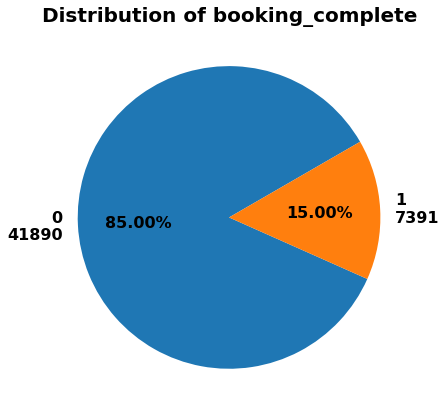

In [402]:
pieplot(df, "booking_complete")

- **Data is imbalanced because of Traget Variable.**

### sales_channel

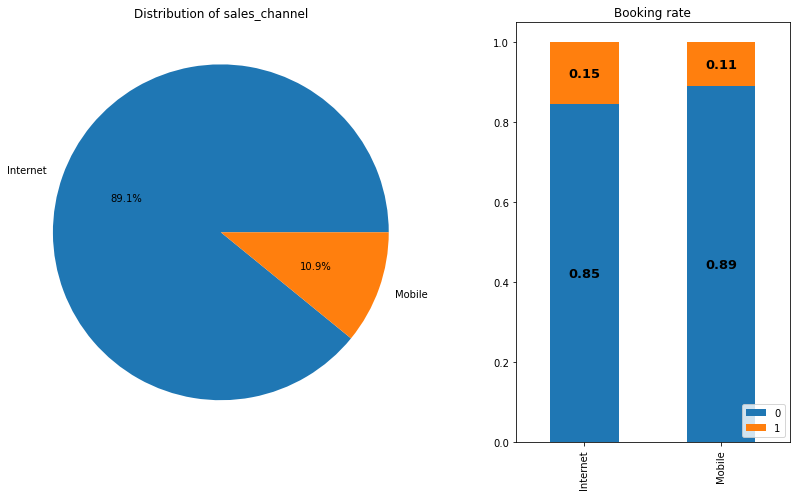

In [403]:
pie_stacked(df, "sales_channel", figsize = (12,7), ratio = [2,1])

In [404]:
df["sales_channel"] = df["sales_channel"].map({"Internet":1, "Mobile":0})

In [405]:
df["sales_channel"].value_counts()

1    43917
0     5364
Name: sales_channel, dtype: int64

- **Internet is a more preferred choice of users for looking the trip details.**
- **Internet is also more probable choice for completing booking as compare to Mobile.**

### trip_type

In [406]:
df["trip_type"].value_counts()

RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64

In [407]:
df["trip_type"][df["trip_type"]=="CircleTrip"] = "RoundTrip"

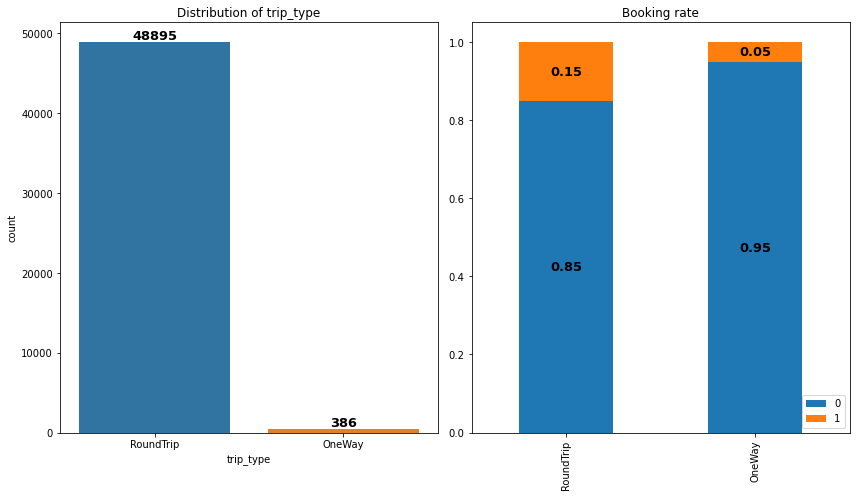

In [408]:
count_stacked(df, "trip_type",figsize = (12,7))

In [409]:
df["trip_type"] =  df["trip_type"].map({"RoundTrip":1, "OneWay":0})

In [410]:
df["trip_type"].value_counts(normalize = True)

1    0.992167
0    0.007833
Name: trip_type, dtype: float64

- **People prefers round trip and they also complete the booking way more as compared to One Way.**

### wants_extra_baggage

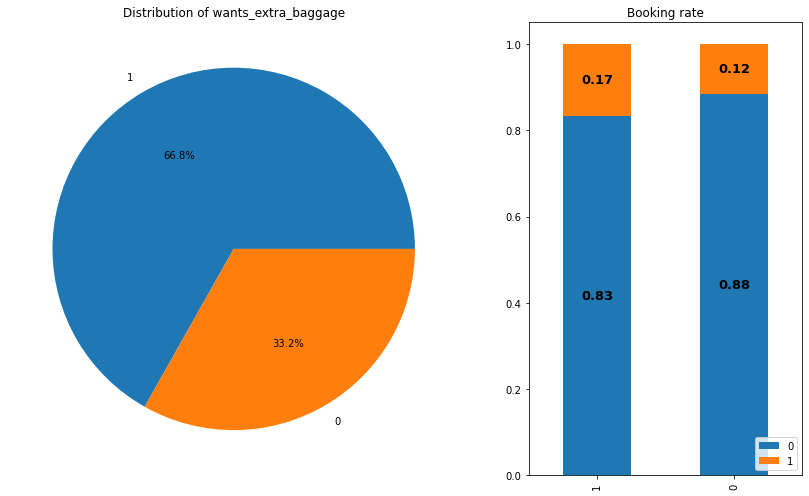

In [411]:
pie_stacked(df, "wants_extra_baggage", figsize = (12,7), ratio = [2,1])

- **People usually requests more for extra baggage and the chances of these people completing booking are higher as compared to the people who don't ask for extra baggage.**

### wants_preferred_seat    

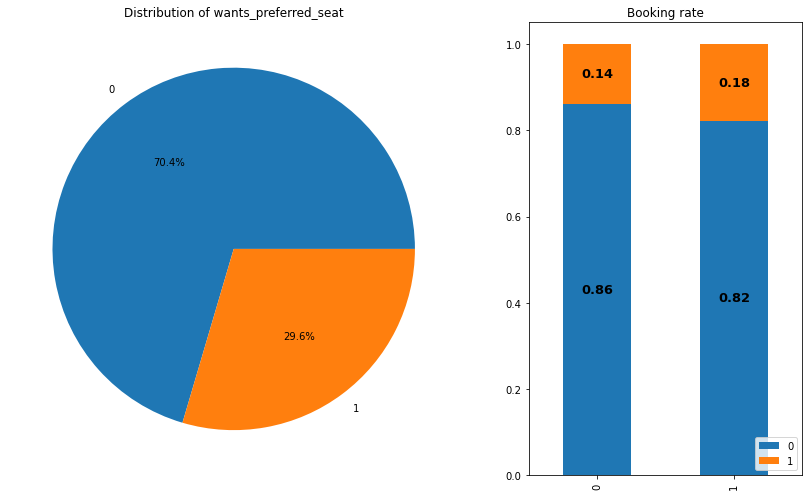

In [412]:
pie_stacked(df, "wants_preferred_seat",figsize = (12,7), ratio = [2,1])

- **There are less people who have enquired specifically for preferred seat,but the chance of completeion of booking is higher as compared to who dosent.**

### wants_in_flight_meals

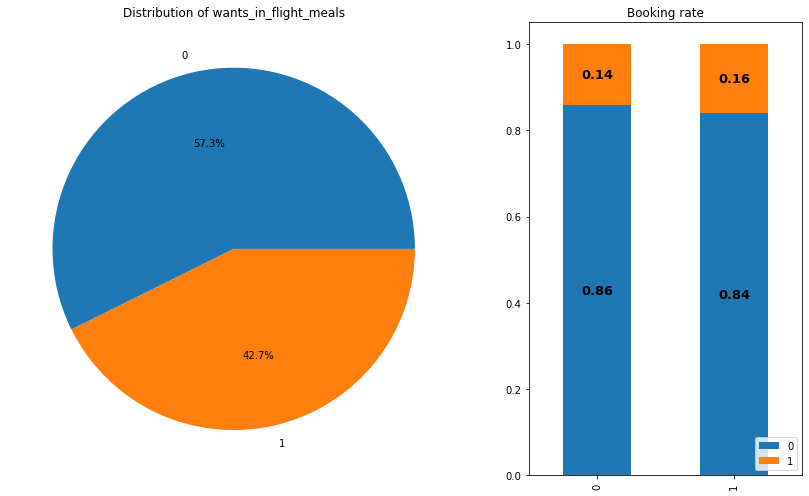

In [413]:
pie_stacked(df, "wants_in_flight_meals",figsize = (12,7), ratio = [2,1])

- **People who are interested in flight meals have more chance of completing the booking than to the people who don't want it.**

### num_passengers

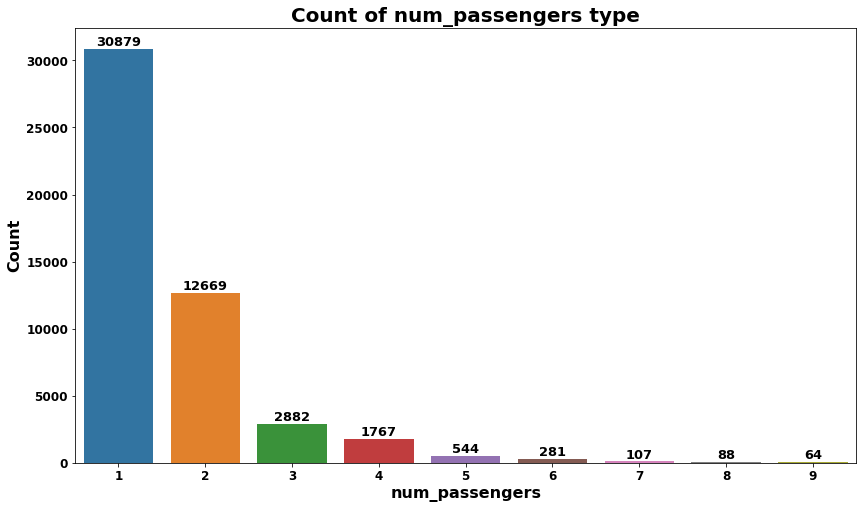

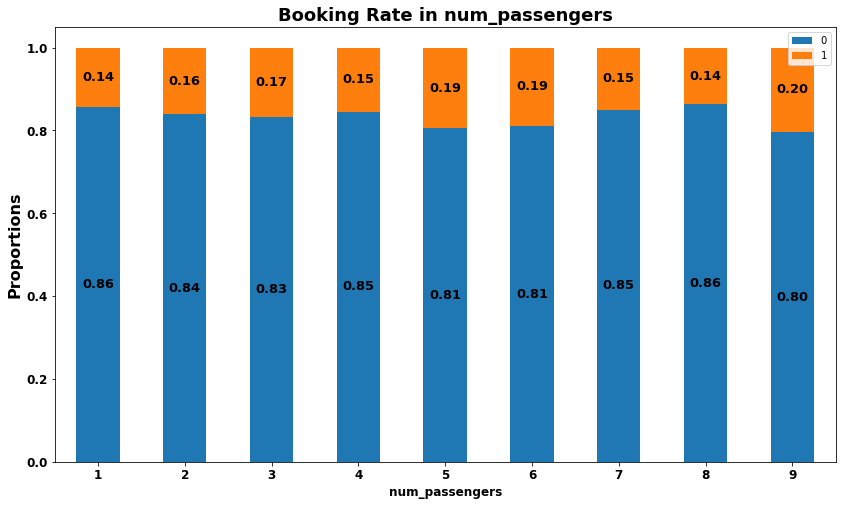

In [414]:
count_plot(df,"num_passengers", fig_size= (14,8))
stacked_barchart(df, col="num_passengers", fig_size = (14,8))

- **More the number of possengers is, higher the chance of completion of booking.**

### flight_day

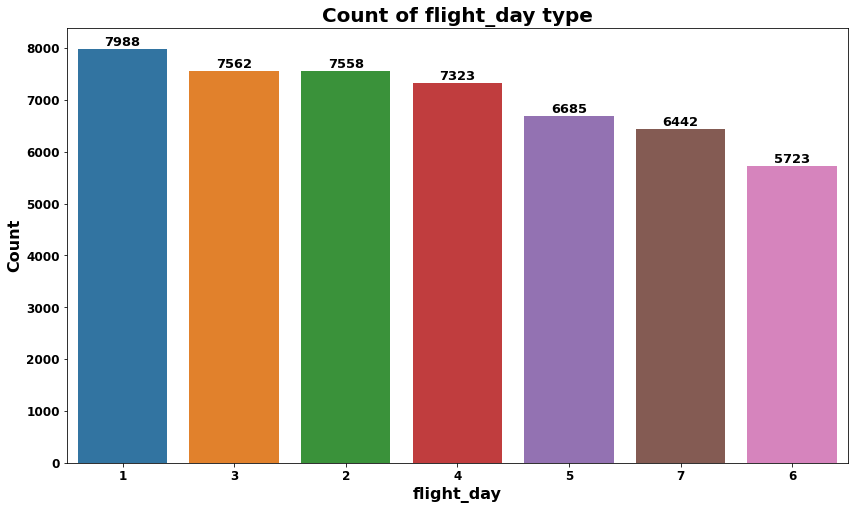

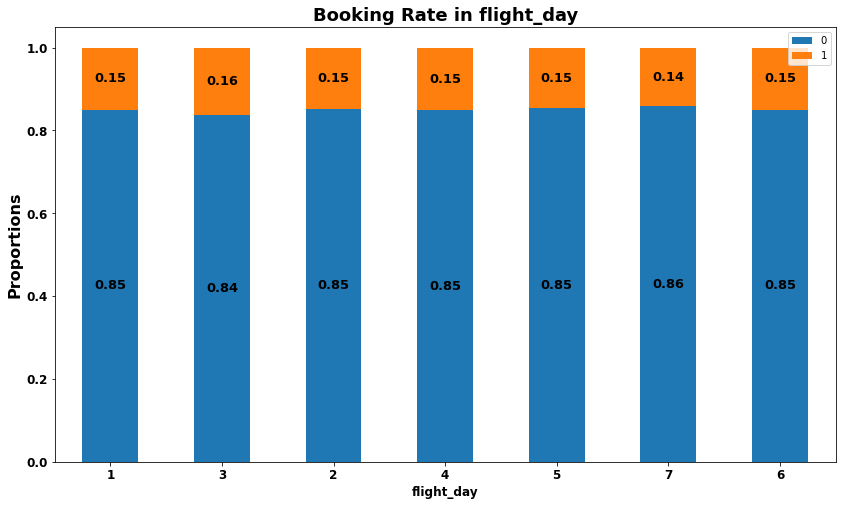

In [415]:
mappings = {"Mon":1, "Tue":2, "Wed":3, "Thu":4,"Fri":5, "Sat":6, "Sun":7 }
df["flight_day"] = df["flight_day"].map(mappings)


count_plot(df,"flight_day", fig_size= (14,8))
stacked_barchart(df, col="flight_day", fig_size = (14,8))

- **All flights looks to have same chance of booking, yet wedesday and monday have good chance as compared to other days, Since they are higher in number and probability.**


### Purchase Lead

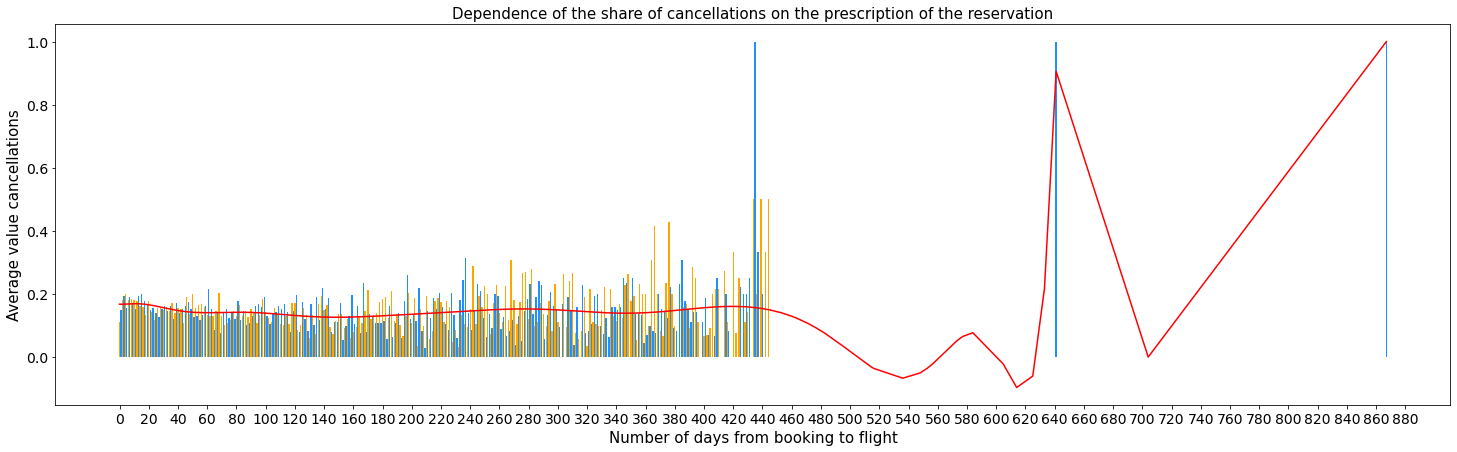

In [416]:
stat = df.groupby(['purchase_lead'], as_index=False).agg({'booking_complete': 'mean'})

fig, ax = plt.subplots(figsize=(25, 7))
ax.bar(stat['purchase_lead'], stat['booking_complete'], width=0.9, color=['orange', 'dodgerblue'])
ax.set_xlabel('Number of days from booking to flight', fontsize = 15)
ax.set_xticks(np.arange(0, 900,20),)
ax.set_ylabel('Average value cancellations', fontsize = 15)
ax.set_title('Dependence of the share of cancellations on the prescription of the reservation', fontsize = 15)
ax.tick_params(axis='both', labelsize=14)

z = np.polyfit (stat['purchase_lead'], stat['booking_complete'], 23)
p = np.poly1d (z)
ax.plot(stat['purchase_lead'], p(stat['purchase_lead']), color='red');

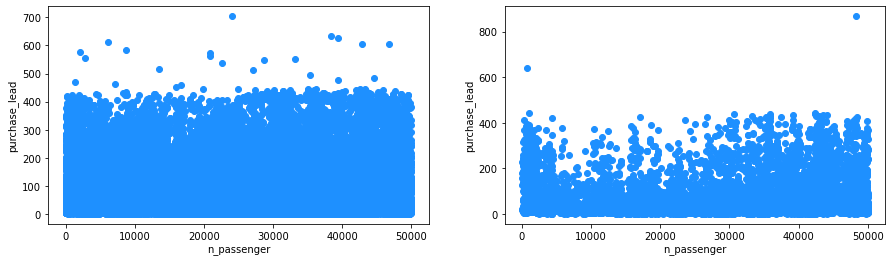

In [417]:


df2 = df[df["booking_complete"] != 1]
df3 = df[df["booking_complete"] == 1]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

ax1.scatter(df2.index, df2["purchase_lead"], c='dodgerblue')
ax1.set_xlabel('n_passenger')
ax1.set_ylabel("purchase_lead")

ax2.scatter(df3.index, df3["purchase_lead"] , c='dodgerblue')
ax2.set_xlabel('n_passenger')
ax2.set_ylabel("purchase_lead")

plt.show()

### There seems to have some outliers

In [418]:
df["purchase_lead"].describe()

count    49281.000000
mean        84.723281
std         90.410229
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64

In [419]:
def check_outliers(data,threshold = 3.9):
    threshold = threshold
    outlier = []
    avg = np.mean(data)
    std = np.std(data)
    for i in data:
        z = (i-avg)/std
        if z > threshold:
            outlier.append(i)

    return outlier

In [420]:
min(check_outliers(df["purchase_lead"]))

439

#### Removing the outliers

In [421]:
# number of instances above 439
len(df[df["purchase_lead"]>=439])

44

In [422]:
df = df[~(df["purchase_lead"]>=439)]

In [423]:

stat = df.groupby(['purchase_lead'], as_index=False).agg({'booking_complete': 'mean'})

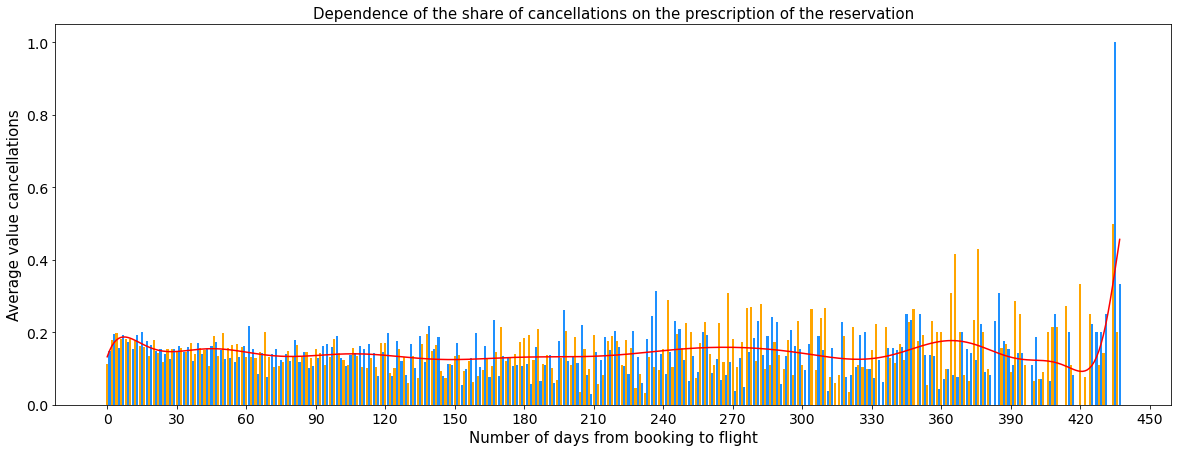

In [424]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(stat['purchase_lead'], stat['booking_complete'], width=0.9, color=['orange', 'dodgerblue'])
ax.set_xlabel('Number of days from booking to flight', fontsize = 15)
ax.set_xticks(np.arange(0,460 ,30))
ax.set_ylabel('Average value cancellations', fontsize = 15)
ax.set_title('Dependence of the share of cancellations on the prescription of the reservation', fontsize = 15)
ax.tick_params(axis='both', labelsize=14)

z = np.polyfit (stat['purchase_lead'], stat['booking_complete'], 23)
p = np.poly1d (z)
ax.plot(stat['purchase_lead'], p(stat['purchase_lead']), color='red');

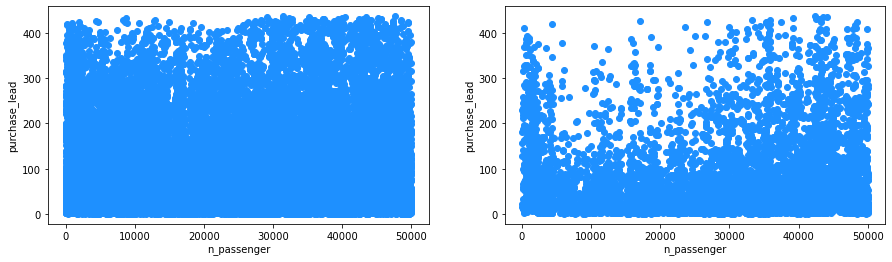

In [425]:


df2 = df[df["booking_complete"] != 1]
df3 = df[df["booking_complete"] == 1]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

ax1.scatter(df2.index, df2["purchase_lead"], c='dodgerblue')
ax1.set_xlabel('n_passenger')
ax1.set_ylabel("purchase_lead")

ax2.scatter(df3.index, df3["purchase_lead"] , c='dodgerblue')
ax2.set_xlabel('n_passenger')
ax2.set_ylabel("purchase_lead")

plt.show()

- **People are more probable to book flights if the number of days to board flight is less than 30 days.**

### length_of_stay

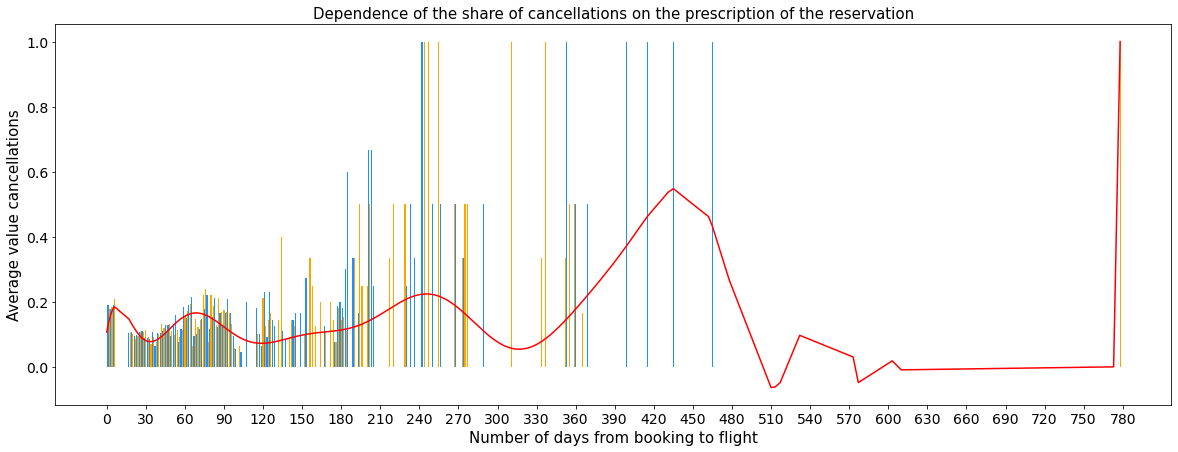

In [426]:
stat = df.groupby(['length_of_stay'], as_index=False).agg({'booking_complete': 'mean'})

fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(stat['length_of_stay'], stat['booking_complete'], width=0.9, color=['orange', 'dodgerblue'])
ax.set_xlabel('Number of days from booking to flight', fontsize = 15)
ax.set_xticks(np.arange(0, 810,30))
ax.set_ylabel('Average value cancellations', fontsize = 15)
ax.set_title('Dependence of the share of cancellations on the prescription of the reservation', fontsize = 15)
ax.tick_params(axis='both', labelsize=14)

z = np.polyfit (stat['length_of_stay'], stat['booking_complete'], 23)
p = np.poly1d (z)
ax.plot(stat['length_of_stay'], p(stat['length_of_stay']), color='red');

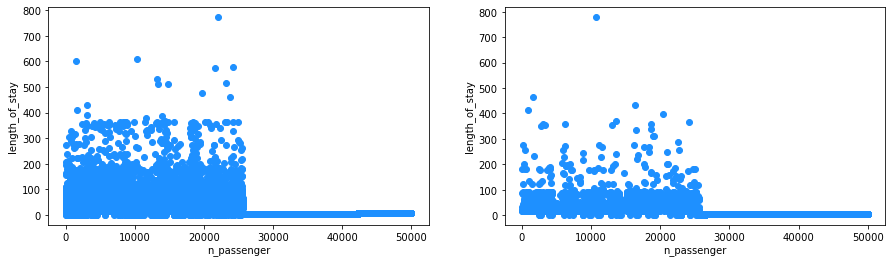

In [427]:
import matplotlib.pyplot as plt

df2 = df[df["booking_complete"] != 1]
df3 = df[df["booking_complete"] == 1]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

ax1.scatter(df2.index, df2["length_of_stay"], c='dodgerblue')
ax1.set_xlabel('n_passenger')
ax1.set_ylabel("length_of_stay")

ax2.scatter(df3.index, df3["length_of_stay"] , c='dodgerblue')
ax2.set_xlabel('n_passenger')
ax2.set_ylabel("length_of_stay")

plt.show()


In [434]:
min(check_outliers( (df3["length_of_stay"]), threshold=5))

190

# Remove Outliers

In [435]:
len(df[(df["length_of_stay"]>=190)])

307

In [437]:
df = df[~(df["length_of_stay"]>=190)]

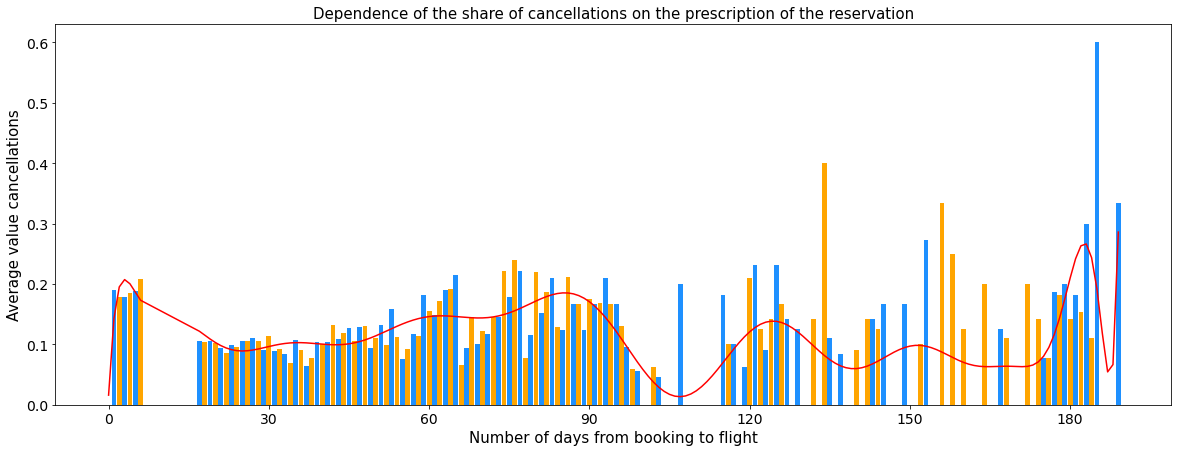

In [438]:
stat = df.groupby(['length_of_stay'], as_index=False).agg({'booking_complete': 'mean'})

fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(stat['length_of_stay'], stat['booking_complete'], width=0.9, color=['orange', 'dodgerblue'])
ax.set_xlabel('Number of days from booking to flight', fontsize = 15)
ax.set_xticks(np.arange(0, 270,30))
ax.set_ylabel('Average value cancellations', fontsize = 15)
ax.set_title('Dependence of the share of cancellations on the prescription of the reservation', fontsize = 15)
ax.tick_params(axis='both', labelsize=14)

z = np.polyfit (stat['length_of_stay'], stat['booking_complete'], 23)
p = np.poly1d (z)
ax.plot(stat['length_of_stay'], p(stat['length_of_stay']), color='red');

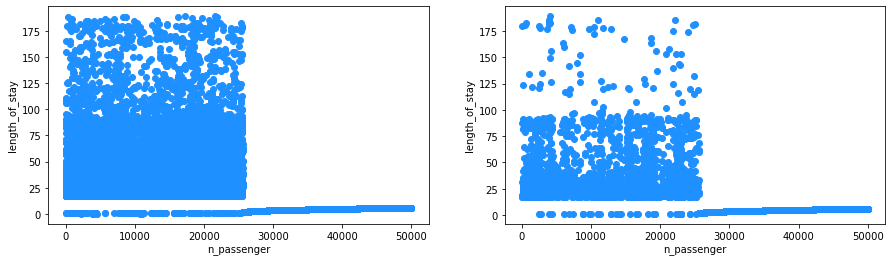

In [439]:
import matplotlib.pyplot as plt

df2 = df[df["booking_complete"] != 1]
df3 = df[df["booking_complete"] == 1]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

ax1.scatter(df2.index, df2["length_of_stay"], c='dodgerblue')
ax1.set_xlabel('n_passenger')
ax1.set_ylabel("length_of_stay")

ax2.scatter(df3.index, df3["length_of_stay"] , c='dodgerblue')
ax2.set_xlabel('n_passenger')
ax2.set_ylabel("length_of_stay")

plt.show()


### flight_hour

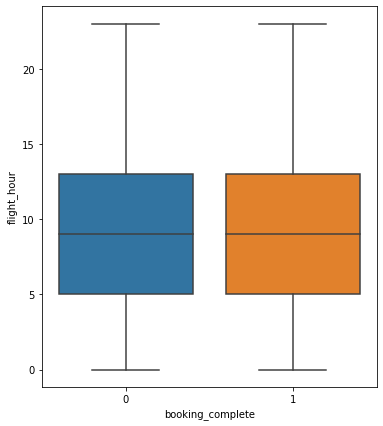

In [440]:
plt.figure(figsize = (6,7))
sns.boxplot(y=df["flight_hour"], x= df['booking_complete'])
plt.show()

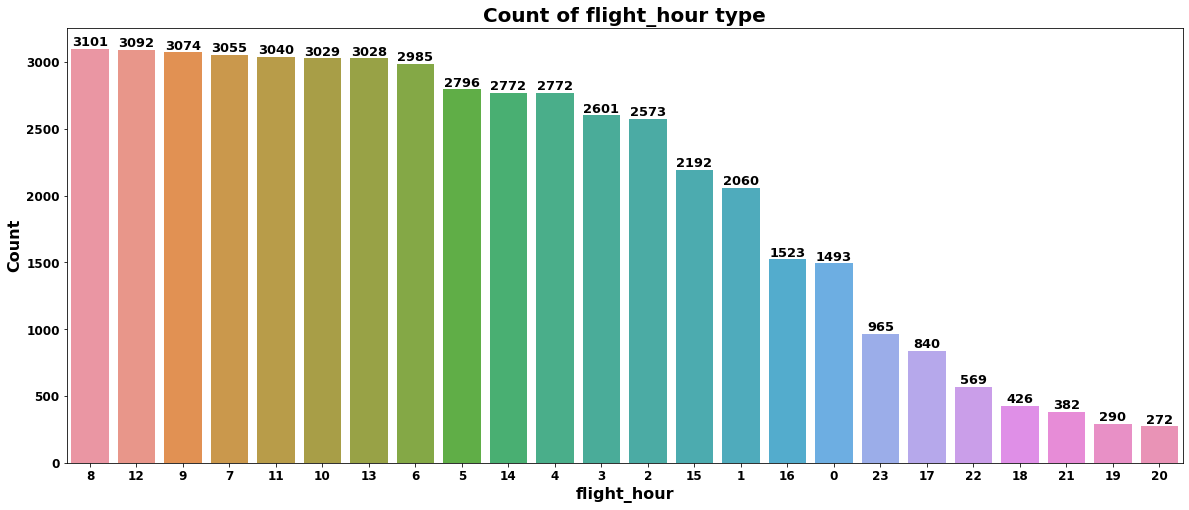

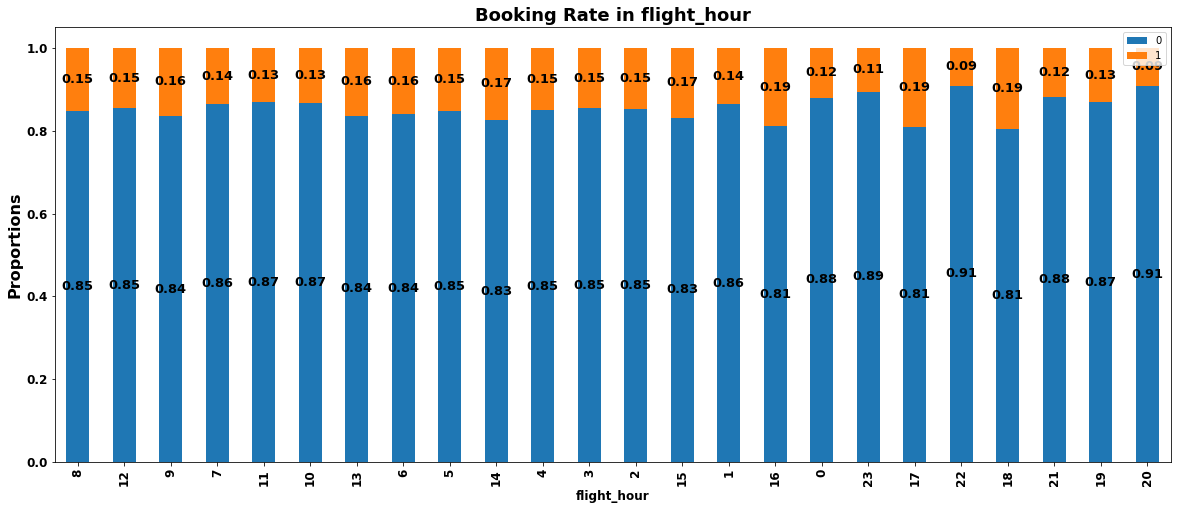

In [441]:
count_plot(df,"flight_hour", fig_size= (20,8))
stacked_barchart(df, col="flight_hour", fig_size = (20,8), rotation_ = 90)

- **People enquired more for morning hour flights ranging from late night 12 am to late afternoon till 3 pm.**
- **People who enquired for 16 hours 18 hours are more probable to book flight and least probable at 20 and 22 hour**

### booking_origin

In [442]:
df["booking_origin"].value_counts()[:20]

Australia         17544
Malaysia           7001
South Korea        4466
Japan              3804
China              3278
Indonesia          2311
Taiwan             2035
Thailand           1984
India              1233
New Zealand        1051
Singapore          1031
United States       450
Vietnam             384
Macau               297
Hong Kong           289
Philippines         260
United Kingdom      173
Brunei              159
Cambodia            130
(not set)            78
Name: booking_origin, dtype: int64

In [443]:
# top 20 booking origin
round((df["booking_origin"].value_counts()[:19].sum()/len(df))*(100),2)

97.85

In [444]:
# Keeping all those origins as "Others" whose instances are less than 50 in dataset and for whom origin is not selected.

others = df_new["booking_origin"].value_counts()[df["booking_origin"].value_counts()<100].index.to_list()
others = others + ["(not set)"]
others

['(not set)',
 'Sri Lanka',
 'Italy',
 'Canada',
 'France',
 'Germany',
 'Myanmar (Burma)',
 'Netherlands',
 'Mauritius',
 'United Arab Emirates',
 'Nepal',
 'Bangladesh',
 'Saudi Arabia',
 'Russia',
 'Spain',
 'Laos',
 'Switzerland',
 'Chile',
 'Qatar',
 'Iran',
 'Sweden',
 'Runion',
 'Oman',
 'Kuwait',
 'Turkey',
 'Brazil',
 'Poland',
 'Mexico',
 'Ireland',
 'Czech Republic',
 'Finland',
 'Austria',
 'Greece',
 'Denmark',
 'Mongolia',
 'Belgium',
 'Maldives',
 'Argentina',
 'New Caledonia',
 'Portugal',
 'Bahrain',
 'Norway',
 'Ukraine',
 'Peru',
 'Colombia',
 'Romania',
 'Kazakhstan',
 'South Africa',
 'Hungary',
 'Kenya',
 'Guam',
 'Israel',
 'Cyprus',
 'Tunisia',
 'Timor-Leste',
 'Solomon Islands',
 'Slovenia',
 'Croatia',
 'Guatemala',
 'Gibraltar',
 'Seychelles',
 'Ghana',
 'Iraq',
 'Pakistan',
 'Belarus',
 'Vanuatu',
 'Malta',
 'Algeria',
 'Czechia',
 'Afghanistan',
 'Lebanon',
 'Estonia',
 'Paraguay',
 'Papua New Guinea',
 'Jordan',
 'Egypt',
 'Slovakia',
 'Nicaragua',
 'Tonga

In [445]:
df["booking_origin"] = df["booking_origin"].apply(lambda x: "Others" if x in others else x)

In [446]:
df["booking_origin"].value_counts()

Australia         17544
Malaysia           7001
South Korea        4466
Japan              3804
China              3278
Indonesia          2311
Taiwan             2035
Thailand           1984
India              1233
New Zealand        1051
Others             1050
Singapore          1031
United States       450
Vietnam             384
Macau               297
Hong Kong           289
Philippines         260
United Kingdom      173
Brunei              159
Cambodia            130
Name: booking_origin, dtype: int64

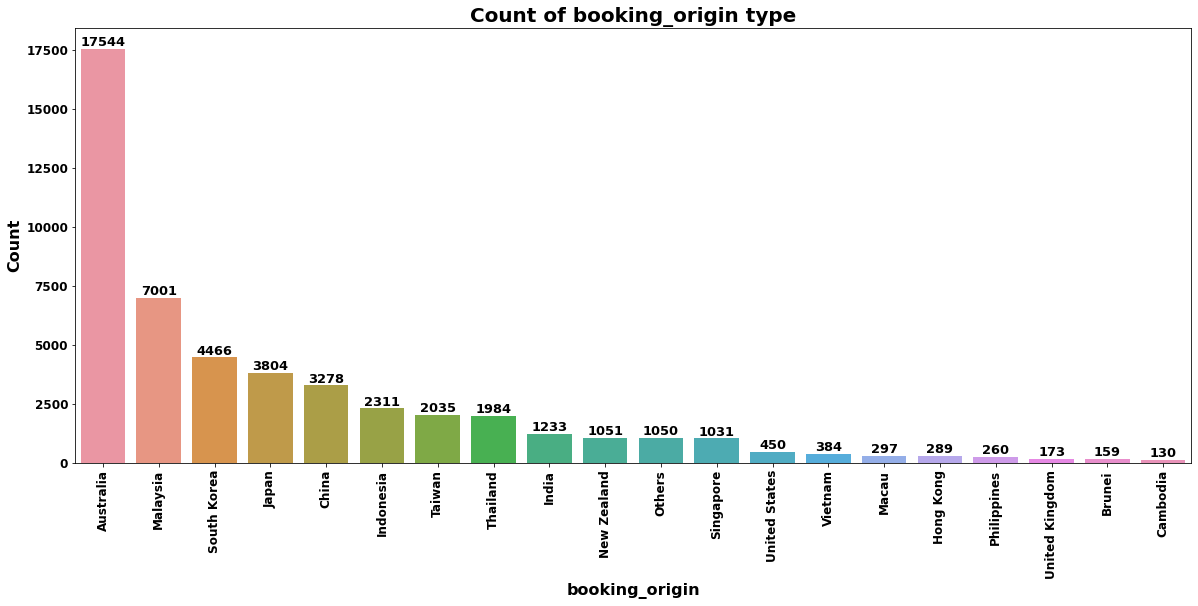

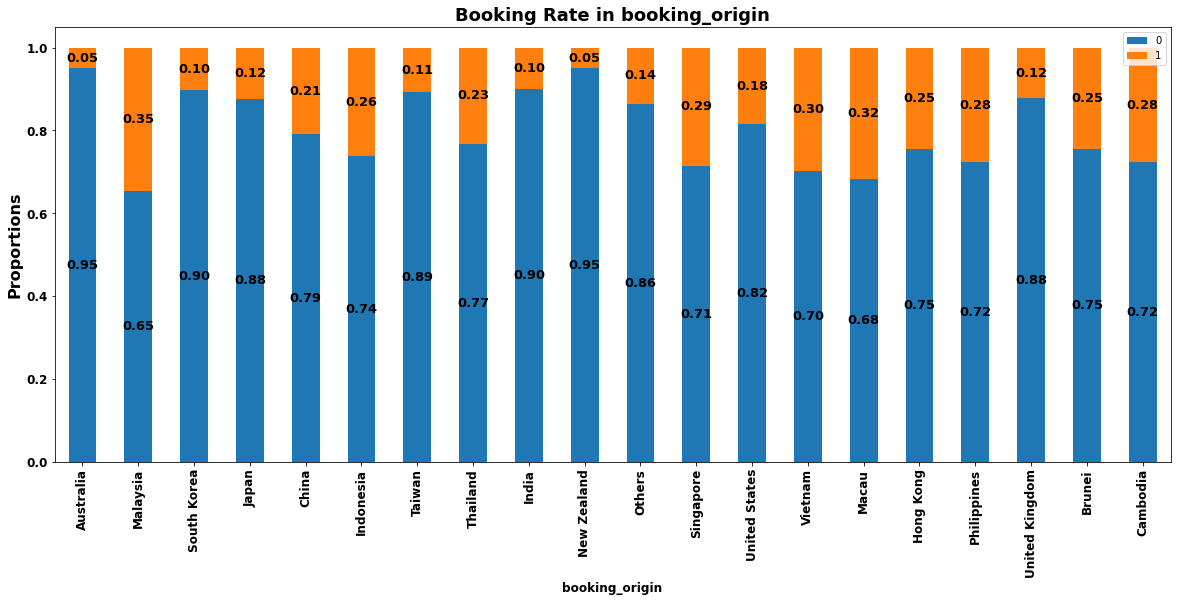

In [447]:
count_plot(df,"booking_origin", fig_size= (20,8), rotation = 90)

stacked_barchart(df, col="booking_origin", fig_size = (20,8), rotation_ = 90)

### flight_duration

In [448]:
df["flight_duration"].value_counts().sort_index()

4.67     2693
4.72      485
4.75     1242
4.83      143
5.00      237
5.07      501
5.13      115
5.33     1503
5.52      662
5.62     5429
6.33     1176
6.42     1704
6.62     4641
7.00     3296
7.42      221
7.57     2778
8.15      299
8.58     6815
8.67      786
8.83    14168
9.50       36
Name: flight_duration, dtype: int64

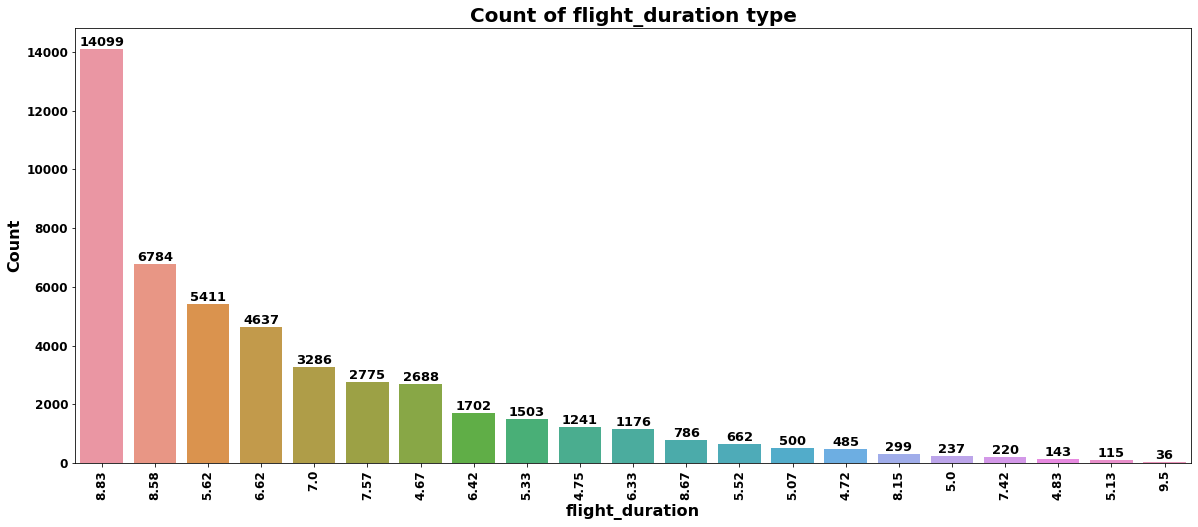

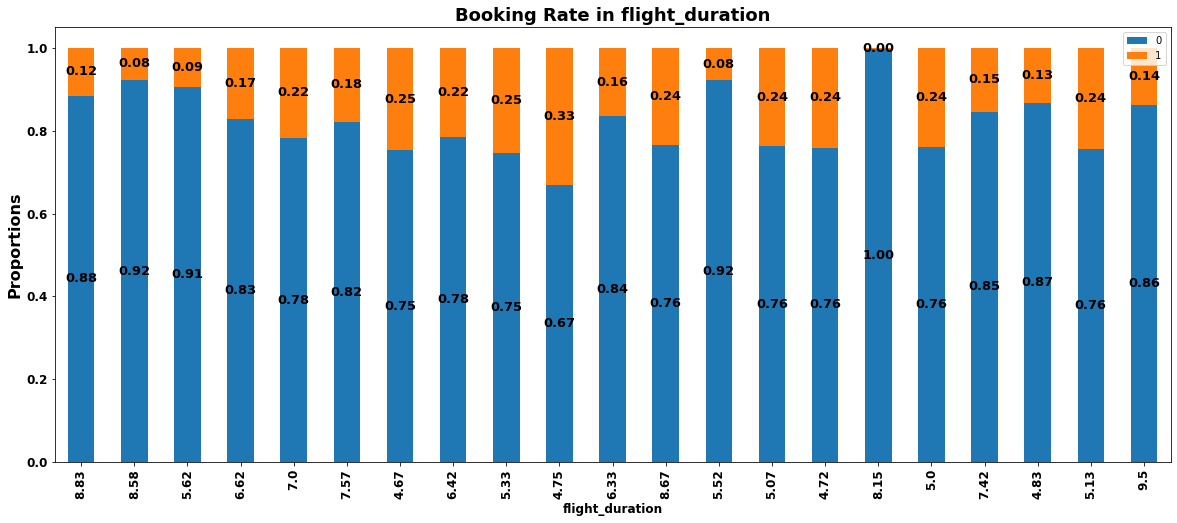

In [449]:
count_plot(df_new,"flight_duration", fig_size= (20,8), rotation = 90)
stacked_barchart(df_new, col="flight_duration", fig_size = (20,8), rotation_ = 90)

In [450]:
df.shape

(48930, 14)

In [451]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  2
purchase_lead            438
length_of_stay           180
flight_hour               24
flight_day                 7
route                    799
booking_origin            20
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [453]:

cols = ['num_passengers', 'flight_hour', 'flight_day', 'purchase_lead', 'length_of_stay','flight_duration',
        'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'sales_channel',"trip_type",
        'route', 'booking_origin','booking_complete']

df = df[cols]

df.head()

,num_passengers,flight_hour,flight_day,purchase_lead,length_of_stay,flight_duration,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,sales_channel,trip_type,route,booking_origin,booking_complete
0,2,7,6,262,19,5.52,1,0,0,1,1,AKLDEL,New Zealand,0
1,1,3,6,112,20,5.52,0,0,0,1,1,AKLDEL,New Zealand,0
2,2,17,3,243,22,5.52,1,1,0,1,1,AKLDEL,India,0
3,1,4,6,96,31,5.52,0,0,1,1,1,AKLDEL,New Zealand,0
4,2,15,3,68,22,5.52,1,0,1,1,1,AKLDEL,India,0



## Data Preparation for modeling
##### Create Dummy variables

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48930 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         48930 non-null  int64  
 1   flight_hour            48930 non-null  int64  
 2   flight_day             48930 non-null  int64  
 3   purchase_lead          48930 non-null  int64  
 4   length_of_stay         48930 non-null  int64  
 5   flight_duration        48930 non-null  float64
 6   wants_extra_baggage    48930 non-null  int64  
 7   wants_preferred_seat   48930 non-null  int64  
 8   wants_in_flight_meals  48930 non-null  int64  
 9   sales_channel          48930 non-null  int64  
 10  trip_type              48930 non-null  int64  
 11  route                  48930 non-null  object 
 12  booking_origin         48930 non-null  object 
 13  booking_complete       48930 non-null  int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 5.6+

In [487]:
ordinal_cols= ['num_passengers','flight_hour','flight_day', ]
nominal_cols = [ 'purchase_lead', 'length_of_stay','flight_duration' ]
binary_cols = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals','sales_channel' ,"trip_type"]
target_encoding_cols = ["route", "booking_origin"]

target_var = ['booking_complete']

In [488]:
len(binary_cols + ordinal_cols + nominal_cols +target_var+ target_encoding_cols)

14

# Target Encoding

In [489]:
# Transforming categorical variables with TargetEncoder

from category_encoders.target_encoder import TargetEncoder

data = df[target_encoding_cols]
data.head()


,route,booking_origin
0,AKLDEL,New Zealand
1,AKLDEL,New Zealand
2,AKLDEL,India
3,AKLDEL,New Zealand
4,AKLDEL,India


In [496]:
encoder = TargetEncoder(smoothing = 0.5)

targ_encoder_df = pd.DataFrame()

for elem in data:
    targ_encoder_df[elem+'_encoding'] = encoder.fit_transform(df[elem], df['booking_complete'])

In [497]:
targ_encoder_df.head()

,route_encoding,booking_origin_encoding
0,0.074954,0.049477
1,0.074954,0.049477
2,0.074954,0.099757
3,0.074954,0.049477
4,0.074954,0.099757


In [498]:
final_df = pd.concat([targ_encoder_df, df[binary_cols + ordinal_cols + nominal_cols +target_var]], axis=1)
final_df.head()

,route_encoding,booking_origin_encoding,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,sales_channel,trip_type,num_passengers,flight_hour,flight_day,purchase_lead,length_of_stay,flight_duration,booking_complete
0,0.074954,0.049477,1,0,0,1,1,2,7,6,262,19,5.52,0
1,0.074954,0.049477,0,0,0,1,1,1,3,6,112,20,5.52,0
2,0.074954,0.099757,1,1,0,1,1,2,17,3,243,22,5.52,0
3,0.074954,0.049477,0,0,1,1,1,1,4,6,96,31,5.52,0
4,0.074954,0.099757,1,0,1,1,1,2,15,3,68,22,5.52,0


In [499]:
final_df.shape

(48930, 14)

In [500]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48930 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   route_encoding           48930 non-null  float64
 1   booking_origin_encoding  48930 non-null  float64
 2   wants_extra_baggage      48930 non-null  int64  
 3   wants_preferred_seat     48930 non-null  int64  
 4   wants_in_flight_meals    48930 non-null  int64  
 5   sales_channel            48930 non-null  int64  
 6   trip_type                48930 non-null  int64  
 7   num_passengers           48930 non-null  int64  
 8   flight_hour              48930 non-null  int64  
 9   flight_day               48930 non-null  int64  
 10  purchase_lead            48930 non-null  int64  
 11  length_of_stay           48930 non-null  int64  
 12  flight_duration          48930 non-null  float64
 13  booking_complete         48930 non-null  int64  
dtypes: float64(3), int64(1

# Correlation: Numerical Varaibles

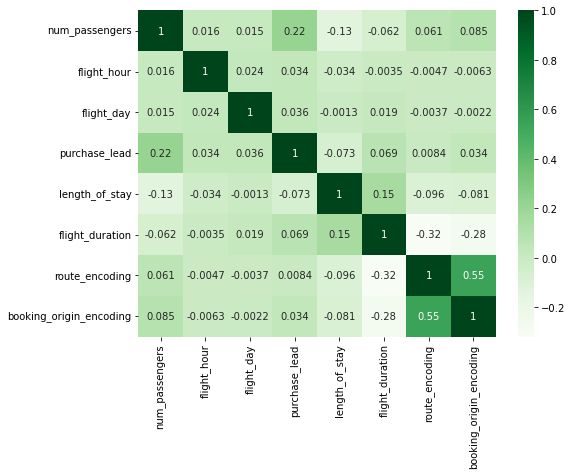

In [502]:
num_cols = ordinal_cols + nominal_cols + targ_encoder_df.columns.to_list()

corr = final_df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True, cmap= "Greens")
plt.show()

# Correlation: Categorical Variable

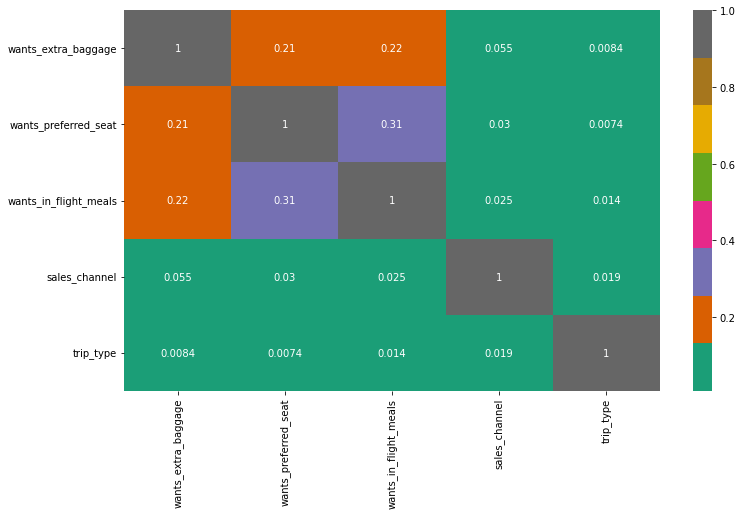

In [503]:
# Import association_metrics  
import association_metrics as am

# Convert you str columns to Category columns
categ_df = final_df[binary_cols].apply(lambda x: x.astype("category"))

# Initialize a CamresV object using your DataFrame
cramersv = am.CramersV(categ_df) 
categ_corr =  cramersv.fit()

plt.figure(figsize = (12,7))
ax = sns.heatmap(categ_corr, annot=True, cmap = "Dark2")
plt.show()

In [524]:
final_df.isna().sum()

route_encoding             0
booking_origin_encoding    0
wants_extra_baggage        0
wants_preferred_seat       0
wants_in_flight_meals      0
sales_channel              0
trip_type                  0
num_passengers             0
flight_hour                0
flight_day                 0
purchase_lead              0
length_of_stay             0
flight_duration            0
booking_complete           0
dtype: int64

# Matmul Information

In [504]:
from sklearn.feature_selection import mutual_info_classif

X_features = final_df.drop("booking_complete",axis=1)
y_target = final_df["booking_complete"]


mi_scores = mutual_info_classif(X_features, y_target, random_state=123)

# Features with their scores
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_features.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

route_encoding             0.052193
booking_origin_encoding    0.044089
flight_duration            0.017773
length_of_stay             0.011552
wants_extra_baggage        0.009869
trip_type                  0.009046
sales_channel              0.006375
wants_in_flight_meals      0.006369
wants_preferred_seat       0.003406
purchase_lead              0.001498
num_passengers             0.001418
flight_hour                0.000421
flight_day                 0.000000
Name: MI Scores, dtype: float64

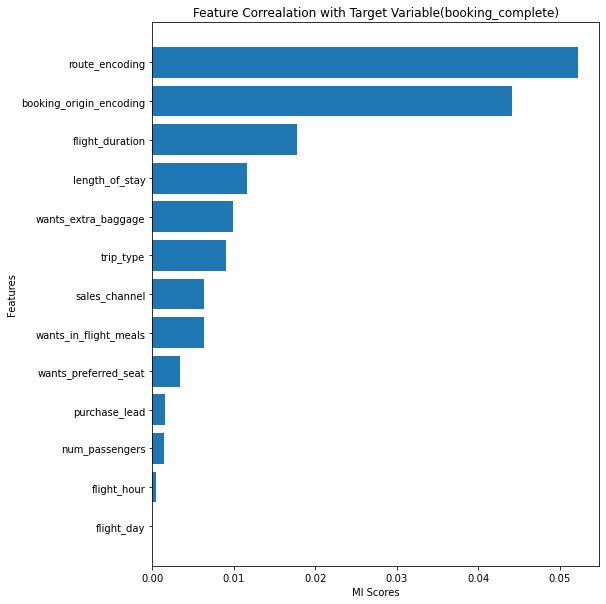

In [505]:
# plot the MI scores
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.figure(figsize=(8, 10))
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Feature Correalation with Target Variable(booking_complete)")
plt.ylabel("Features")
plt.xlabel("MI Scores")

plt.show()

# Standardization of quantitative variables

In [553]:
quant_list = ['route_encoding', 'booking_origin_encoding', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'sales_channel',
       'trip_type', 'num_passengers', 'flight_hour', 'flight_day',
       'purchase_lead', 'length_of_stay', 'flight_duration',
       ]

In [554]:
data_quant = final_df[quant_list]

std_scaler = StandardScaler()
std_scaler.fit(data_quant)
std_scaled = std_scaler.transform(data_quant)
std_quant_list = ['std_scaled_' + elem for elem in quant_list]
final_df[std_quant_list] = std_scaled
final_df.head()

,route_encoding,booking_origin_encoding,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,sales_channel,trip_type,num_passengers,flight_hour,flight_day,...,std_scaled_wants_preferred_seat,std_scaled_wants_in_flight_meals,std_scaled_sales_channel,std_scaled_trip_type,std_scaled_num_passengers,std_scaled_flight_hour,std_scaled_flight_day,std_scaled_purchase_lead,std_scaled_length_of_stay,std_scaled_flight_duration
0,0.074954,0.049477,1,0,0,1,1,2,7,6,...,-0.646636,-0.860617,0.34986,0.089055,0.400952,-0.382233,1.098018,1.979591,-0.093272,-1.172696
1,0.074954,0.049477,0,0,0,1,1,1,3,6,...,-0.646636,-0.860617,0.34986,0.089055,-0.580959,-1.121300,1.098018,0.305918,-0.054134,-1.172696
2,0.074954,0.099757,1,1,0,1,1,2,17,3,...,1.546466,-0.860617,0.34986,0.089055,0.400952,1.465435,-0.408150,1.767593,0.024140,-1.172696
3,0.074954,0.049477,0,0,1,1,1,1,4,6,...,-0.646636,1.161957,0.34986,0.089055,-0.580959,-0.936533,1.098018,0.127393,0.376374,-1.172696
4,0.074954,0.099757,1,0,1,1,1,2,15,3,...,-0.646636,1.161957,0.34986,0.089055,0.400952,1.095902,-0.408150,-0.185025,0.024140,-1.172696


In [555]:
final_scaled_df =  final_df[std_quant_list + ["booking_complete"]]
final_nonscaled_df = final_df[quant_list + ["booking_complete"]]

In [556]:
final_scaled_df.shape

(48930, 14)

In [558]:
final_scaled_df

,std_scaled_route_encoding,std_scaled_booking_origin_encoding,std_scaled_wants_extra_baggage,std_scaled_wants_preferred_seat,std_scaled_wants_in_flight_meals,std_scaled_sales_channel,std_scaled_trip_type,std_scaled_num_passengers,std_scaled_flight_hour,std_scaled_flight_day,std_scaled_purchase_lead,std_scaled_length_of_stay,std_scaled_flight_duration,booking_complete
0,-0.647716,-0.927960,0.706034,-0.646636,-0.860617,0.34986,0.089055,0.400952,-0.382233,1.098018,1.979591,-0.093272,-1.172696,0
1,-0.647716,-0.927960,-1.416362,-0.646636,-0.860617,0.34986,0.089055,-0.580959,-1.121300,1.098018,0.305918,-0.054134,-1.172696,0
2,-0.647716,-0.463385,0.706034,1.546466,-0.860617,0.34986,0.089055,0.400952,1.465435,-0.408150,1.767593,0.024140,-1.172696,0
3,-0.647716,-0.927960,-1.416362,-0.646636,1.161957,0.34986,0.089055,-0.580959,-0.936533,1.098018,0.127393,0.376374,-1.172696,0
4,-0.647716,-0.463385,0.706034,-0.646636,1.161957,0.34986,0.089055,0.400952,1.095902,-0.408150,-0.185025,0.024140,-1.172696,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.778678,-0.922703,0.706034,-0.646636,1.161957,0.34986,0.089055,0.400952,-0.012699,1.098018,-0.642496,-0.602054,-1.105875,0
49996,-0.778678,-0.922703,-1.416362,-0.646636,-0.860617,0.34986,0.089055,-0.580959,-0.936533,1.600074,0.294761,-0.602054,-1.105875,0
49997,-0.778678,-0.922703,-1.416362,-0.646636,1.161957,0.34986,0.089055,-0.580959,2.389269,1.098018,-0.675969,-0.602054,-1.105875,0
49998,-0.778678,-0.922703,0.706034,-0.646636,1.161957,0.34986,0.089055,-0.580959,0.356834,-1.412262,-0.776390,-0.602054,-1.105875,0


In [559]:
final_nonscaled_df.shape

(48930, 14)

In [561]:
final_nonscaled_df.head()

,route_encoding,booking_origin_encoding,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,sales_channel,trip_type,num_passengers,flight_hour,flight_day,purchase_lead,length_of_stay,flight_duration,booking_complete
0,0.074954,0.049477,1,0,0,1,1,2,7,6,262,19,5.52,0
1,0.074954,0.049477,0,0,0,1,1,1,3,6,112,20,5.52,0
2,0.074954,0.099757,1,1,0,1,1,2,17,3,243,22,5.52,0
3,0.074954,0.049477,0,0,1,1,1,1,4,6,96,31,5.52,0
4,0.074954,0.099757,1,0,1,1,1,2,15,3,68,22,5.52,0


# Train Test Split

In [562]:
from sklearn.model_selection import train_test_split

In [565]:
df_train_scaled, df_test_scaled = train_test_split(final_nonscaled_df, train_size = 0.7, test_size = 0.3, random_state = 100 )
df_train, df_test = train_test_split(final_nonscaled_df, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [566]:
print("Non scaled df")
print(df_train.shape)
print(df_test.shape)

Non scaled df
(34251, 14)
(14679, 14)


In [567]:
print("Scaled df")
print(df_train_scaled.shape)
print(df_test_scaled.shape)

Scaled df
(34251, 14)
(14679, 14)


In [568]:
x_train = df_train.drop("booking_complete", axis=1)
y_train = df_train["booking_complete"]

x_test = df_test.drop("booking_complete", axis=1)
y_test = df_test["booking_complete"]


print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (34251, 13)
y_train (34251,)
x_test (14679, 13)
y_test (14679,)


In [570]:
x_train_scaled = df_train_scaled.drop("booking_complete", axis=1)
y_train_scaled = df_train_scaled["booking_complete"]

x_test_scaled = df_test_scaled.drop("booking_complete", axis=1)
y_test_scaled = df_test_scaled["booking_complete"]


print("x_train_scaled", x_train_scaled.shape)
print("y_train_scaled", y_train_scaled.shape)
print("x_test_scaled", x_test_scaled.shape)
print("y_test_scaled", y_test_scaled.shape)

x_train_scaled (34251, 13)
y_train_scaled (34251,)
x_test_scaled (14679, 13)
y_test_scaled (14679,)


# Check of Multicollinearity for Linear Models: VIF

In [571]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor


def vif(X_train):    
    vif_df = pd.DataFrame()
    vif_df["column_name"] = X_train.columns
    vif_df["vif_values"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df.sort_values(by = "vif_values", ascending = False, inplace  = True)
    vif_df.reset_index( drop=True, inplace= True)
    return vif_df

In [ ]:
vif(x_train)

# Random Forest

In [573]:
rf_clf = RandomForestClassifier()

parametrs = { "n_estimators" : [100, 250, 500], 
              "max_features" : ['sqrt', 'log2', None], 
              "max_depth" : [68, 10, 12], 
              "min_samples_split" : [2, 4, 6, 8],
              "class_weight" : ['balanced_subsample', 'balanced', None, {0: 0.5, 1: 2.8}],
              "criterion": ['gini', 'entropy', 'log_loss']
            }

grid = GridSearchCV(rf_clf, parametrs, n_jobs=-1, scoring='roc_auc', verbose=1)
grid.fit(x_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


KeyboardInterrupt: 

# Logistic Regression

In [311]:
X_train1 = sm.add_constant(x_train)
logit1 = sm.GLM(y_train,X_train1, family = sm.families.Binomial() ) # FAMILY IS USED FOR LINK FUNCTION BEING LOGIT )
glm1   = logit1.fit()
glm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       booking_complete   No. Observations:                34149
Model:                            GLM   Df Residuals:                    34136
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12094.
Date:                Fri, 07 Jul 2023   Deviance:                       24188.
Time:                        12:53:27   Pearson chi2:                 3.18e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1276
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.5824      0.130    -35.352      0.000      -4.836      -4.328
route_encoding              5.3587      0.162     32.997      0.000       5.040       5.677
booking_origin_encoding     4.7871      0.162     29.632      0.000       4.470       5.104
wants_extra_baggage         0.4026      0.039     10.255      0.000       0.326       0.480
wants_preferred_seat        0.2853      0.038      7.547      0.000       0.211       0.359
wants_in_flight_meals       0.2110      0.036      5.884      0.000       0.141       0.281
sales_channel               0.6576      0.060     11.049      0.000       0.541       0.774
num_passengers             -0.0475      0.016     -2.928      0.003      -0.079      -0.016
flight_hour                 0.0076      0.003      2.458      0.014       0.002       0.014
flight_day                 -0.0108      0.008     -1.296      0.195      -0.027       0.006
purchase_lead              -0.0010      0.000     -5.270      0.000      -0.001      -0.001
length_of_stay             -0.0092      0.001    -11.504      0.000      -0.011      -0.008
flight_duration             0.0355      0.012      2.929      0.003       0.012       0.059
===========================================================================================
"""

In [312]:
X_train2 = X_train1.drop("flight_day",axis=1)
logit2 = sm.GLM(y_train,X_train2, family = sm.families.Binomial() ) # FAMILY IS USED FOR LINK FUNCTION BEING LOGIT )
glm2   = logit2.fit()
glm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       booking_complete   No. Observations:                34149
Model:                            GLM   Df Residuals:                    34137
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12095.
Date:                Fri, 07 Jul 2023   Deviance:                       24190.
Time:                        12:54:04   Pearson chi2:                 3.18e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1275
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.6230      0.126    -36.738      0.000      -4.870      -4.376
route_encoding              5.3595      0.162     33.001      0.000       5.041       5.678
booking_origin_encoding     4.7873      0.162     29.636      0.000       4.471       5.104
wants_extra_baggage         0.4031      0.039     10.267      0.000       0.326       0.480
wants_preferred_seat        0.2852      0.038      7.545      0.000       0.211       0.359
wants_in_flight_meals       0.2107      0.036      5.877      0.000       0.140       0.281
sales_channel               0.6604      0.059     11.104      0.000       0.544       0.777
num_passengers             -0.0478      0.016     -2.945      0.003      -0.080      -0.016
flight_hour                 0.0075      0.003      2.423      0.015       0.001       0.014
purchase_lead              -0.0010      0.000     -5.314      0.000      -0.001      -0.001
length_of_stay             -0.0092      0.001    -11.505      0.000      -0.011      -0.008
flight_duration             0.0354      0.012      2.916      0.004       0.012       0.059
===========================================================================================
"""

In [313]:
train_prob      = glm2.predict(X_train2)
train_pred      = train_prob.apply( lambda  x: 1 if x>=0.3 else 0)

In [314]:
accuracy_score(y_train, train_pred)

0.8228059386804885

In [315]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     29033
           1       0.41      0.40      0.40      5116

    accuracy                           0.82     34149
   macro avg       0.65      0.65      0.65     34149
weighted avg       0.82      0.82      0.82     34149



In [316]:
# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=1000, min_samples_split=100, random_state=0, max_depth=None)

# Fit the model to the training data
rfc.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=0)

In [317]:
y_pred = rfc.predict(x_train)

In [318]:
print(accuracy_score(y_train, y_pred))
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))

0.8600251837535506
0.7847457627118644
0.09050039093041438


In [319]:


train_prob = rfc.predict_proba(x_train)


    

In [320]:
for i in np.arange(0,1,0.05):
    train_pred = (train_prob[:, 1] > i).astype(int)
    print("\n")
    print(i)
    print(accuracy_score(y_train, train_pred))
    print(precision_score(y_train, train_pred))
    print(recall_score(y_train, train_pred))
    print("~"*50)
    print("\n")



0.0
0.1498140501918065
0.1498140501918065
1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




0.05
0.4690620515974113
0.21980624327233583
0.9978498827208757
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




0.1
0.6385252862455709
0.28645710233987237
0.947615324472244
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




0.15000000000000002
0.7203139184163518
0.33308242378622505
0.8649335418295543
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




0.2
0.7716184954171426
0.3741439159395816
0.7795152462861611
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




0.25
0.8190869425166184
0.4347184656995328
0.691164972634871
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




0.30000000000000004
0.85009809950511
0.4997368882652166
0.5568803752931978
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




0.35000000000000003
0.8658525871914258
0.573997233748271
0.40559030492572323
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




0.4
0.8683416791121262
0.64325323475